<a href="https://colab.research.google.com/github/computer-s-2/Fake-News-Detector/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Fake News Detection

---

**Description:** Build a fake news detector using a simple CNN in Keras. This is a text classification problem where you will predict whether a news article is fake or real based on the text of the article.



## Overview
---

The ability to automatically detect fake news articles can help us combat the spread of misinformation and protect the public from false or misleading information. In this notebook, you will preprocess text data, build a CNN model using Keras's `TextVectorization` layer, and use embeddings to improve the performance of the model.

<br>

**More about the dataset:**
>The ISOT Fake News Dataset contains two types of articles fake and real News. This dataset was collected from realworld sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news
articles were collected from unreliable websites that were flagged by Politifact (a fact-checking
organization in the USA) and Wikipedia. The dataset contains different types of articles on different
topics, however, the majority of articles focus on political and World news topics

<br>

In **Part 1**, you will start by exploring the dataset and visualizing the titles of the news articles as wordclouds. You will also preprocess text by removing stopwords and save it to be used later.

In **Part 2**, you will build a CNN model using Keras's `TextVectorization` layer, then train and evaluate results on text that has ***not*** been pre-processed to remove stopwords.

In **Part 3**, you will do the same thing as in Part 2, but this time, you will use the pre-processed text with stopwords removed in order to improve the accuracy of the model.

In **Part 4**, you will use an embedding layer in the CNN model to improve the performance of the model.


**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
!pip install --quiet gdown==4.5.4 --no-cache-dir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import string
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS

from wordcloud import WordCloud

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### **Part 1:** Exploratory Data Analysis (EDA)
---





#### **Step #1:** Import and pre-process data


In [ ]:
!gdown 1lEK4q5rbE2WWrwATUgnsFG5LI8TvTE9Y
!unzip -qq real_or_fake_news.zip;

true = pd.read_csv("real_news.csv")
fake = pd.read_csv("fake_news.csv")

# print(true.head())
# print(fake.head())
true['category'] = 1
fake['category'] = 0

Downloading...
From: https://drive.google.com/uc?id=1lEK4q5rbE2WWrwATUgnsFG5LI8TvTE9Y
To: /content/real_or_fake_news.zip
100% 43.0M/43.0M [00:00<00:00, 233MB/s]
replace fake_news.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace real_news.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


Check for null enteries. This is all for the "true" dataset.

In [ ]:
true.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

Check for duplicate entries.

In [ ]:
true.duplicated().sum()

206

Drop duplicates

In [ ]:
true = true.drop_duplicates()

##### **Step #1.1:** Check the fake news dataset for null values and duplicates. Remove any duplicates.

In [ ]:
fake.isnull().sum()
# none
fake.duplicated().sum()
# 3
fake = fake.drop_duplicates()

Let's visualize the article titles as a wordcloud.

In [ ]:
# Defining a function that will plot a wordcloud using a text input
def plot_wordcloud(text):
  plt.figure(figsize = (20,20))
  wordcloud = WordCloud(
      max_words = 500,
      width = 1600,
      height = 800,
      stopwords = stopwords,
      min_word_length = 3
  ).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");
  return

# Saving all the real news article titles into one long string
real_news_text = " ".join(true[true.category == 1].title)
# Saving all the fake news article titles into one long string
fake_news_text = " ".join(fake[fake.category == 0].title)

Real news wordcloud

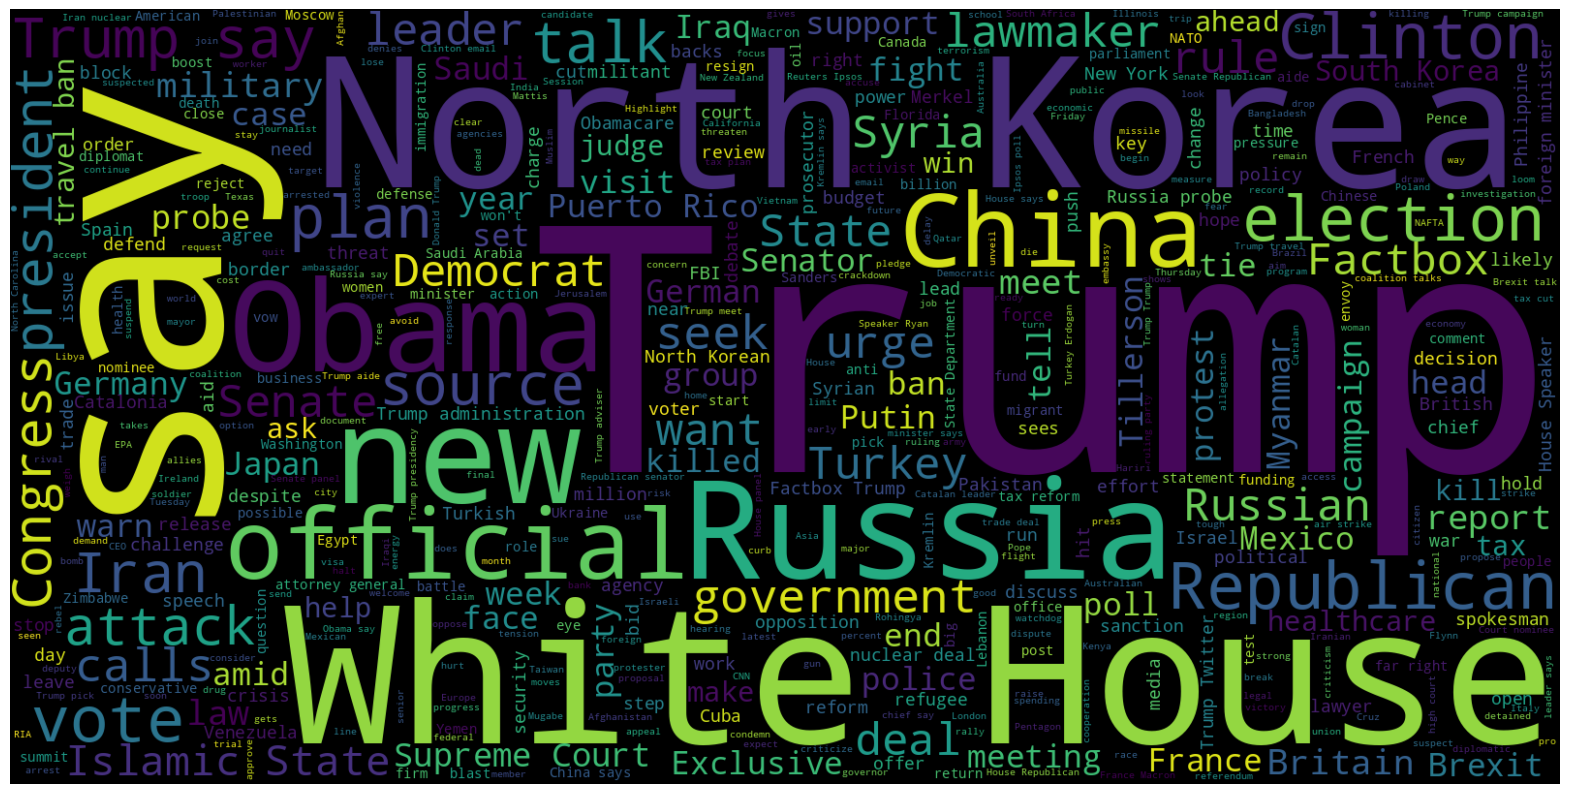

In [ ]:
plot_wordcloud(real_news_text)

Fake news wordcloud

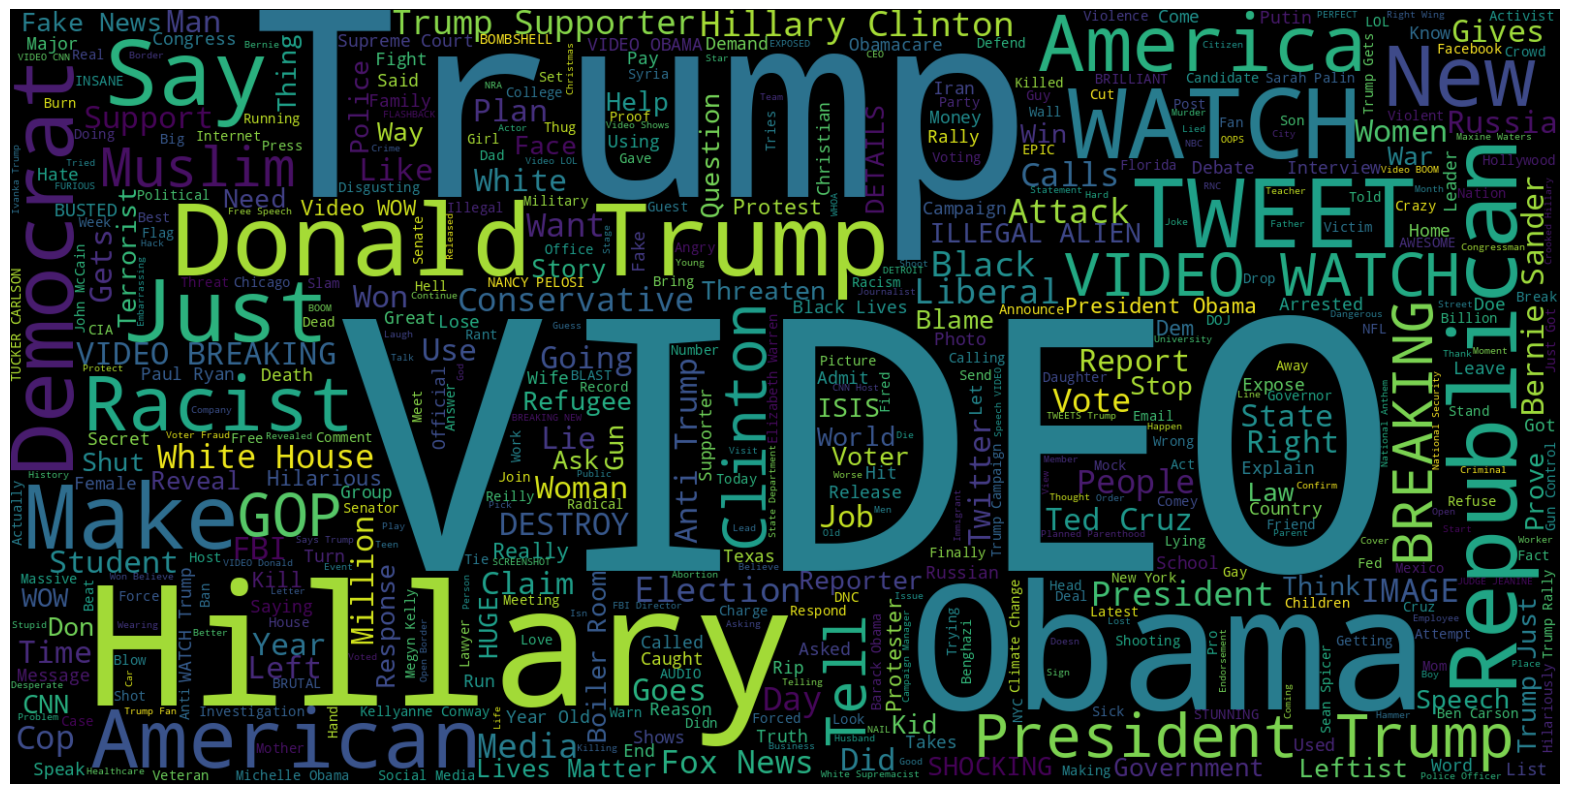

In [ ]:
plot_wordcloud(fake_news_text)

Combine datasets, remove puncutation, covert words to lowercase, and remove stopwords using sklearn.

In [ ]:
# Combine the true and fake news datasets into one dataframe.
df = pd.concat([true,fake])

# Define a function to remove punctuation.
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Use pandas to apply the remove_punctuations function to the 'text' column
df['processed_text'] = df['text'].apply(remove_punctuations)
# Covert the processed text to lowercase
df['processed_text'] = df['processed_text'].apply(str.lower)
# Remove all the stopwords from the processed text
df['processed_text'] = df['processed_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])
    )

### **Part 2:** Fake News Detection with a CNN
---


#### **Step #2:** Split into train and test sets



In [ ]:
# We will import the original, unprocessed text of the news articles.
inputs = df['text']
output = df['category']

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    output,
    shuffle=True,
    test_size=0.2,
    random_state=42
 )

#### **Step #3:** Vectorize the data

In [ ]:
vectorize_layer = TextVectorization(max_tokens = 5000, output_mode = 'int', output_sequence_length=100)
vectorize_layer.adapt(x_train)

#####  **Step #3.2:** Print the first 50 words of the vocabulary

In [ ]:
vectorize_layer.get_vocabulary()[:50]

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'a',
 'and',
 'in',
 'that',
 'on',
 's',
 'for',
 'is',
 'he',
 'said',
 'it',
 'with',
 'trump',
 'was',
 'as',
 'his',
 'by',
 'has',
 'be',
 'have',
 'not',
 'from',
 'this',
 'at',
 'are',
 'who',
 'an',
 'they',
 'us',
 'but',
 'would',
 'we',
 'i',
 'president',
 'about',
 'will',
 'their',
 'had',
 'you',
 't',
 'been',
 'people',
 'were',
 'or',
 'more']

#### **Step #4:** Build Neural Network.

##### **Step #4.1:** Initialize the model and add the input and vectorization layers.

In [ ]:
model = Sequential()

model.add(Input(shape=(1,), dtype = "string"))
model.add(vectorize_layer)

##### **Step #4.2:** Build the CNN layers
Reshape vectorization layer

In [ ]:
model.add(Lambda(lambda x: tf.cast(x, 'float32')))
model.add(Reshape((100, 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation = "relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 lambda_2 (Lambda)           (None, 100)               0         
                                                                 
 reshape_2 (Reshape)         (None, 100, 1)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           768       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 48, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6144)             

#### **Step #5:** Compile and train the model

In [ ]:
opt = Adam(learning_rate=.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5, batch_size = 256);

Epoch 1/5
140/140 [==============================] - 14s 32ms/step - loss: 28.3998 - accuracy: 0.5089
Epoch 2/5
140/140 [==============================] - 4s 25ms/step - loss: 0.6918 - accuracy: 0.5267
Epoch 3/5
140/140 [==============================] - 3s 24ms/step - loss: 0.6910 - accuracy: 0.5267
Epoch 4/5
140/140 [==============================] - 6s 40ms/step - loss: 0.6905 - accuracy: 0.5267
Epoch 5/5
140/140 [==============================] - 3s 24ms/step - loss: 0.6897 - accuracy: 0.5267


#### **Step #6:** Evaluate the model


In [ ]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

280/280 [==============================] - 2s 6ms/step - loss: 0.6902 - accuracy: 0.5200


[0.6901684403419495, 0.5200268626213074]

### **Part 3:** Fake News Detection with Stop Word Removal
---
Remove stopwords from article text.

#### **Step #2:** Split into train and test sets



In [ ]:
# This time we will import the preprocessed text
inputs = df['processed_text']
output = df['category']

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    output,
    shuffle=True,
    test_size=0.2,
    random_state=42
 )

#### **Step #3:** Vectorize the data



In [ ]:
vectorize_layer = TextVectorization(max_tokens=5000, output_mode="int", output_sequence_length=100)
vectorize_layer.adapt(x_train)
vectorize_layer.get_vocabulary()[:50]

['',
 '[UNK]',
 's',
 'said',
 'trump',
 'president',
 't',
 'people',
 'state',
 'new',
 'donald',
 'house',
 'government',
 'clinton',
 'states',
 'obama',
 'just',
 'republican',
 'told',
 'united',
 'white',
 'like',
 'campaign',
 'news',
 'time',
 'election',
 'party',
 'year',
 'country',
 'did',
 'hillary',
 'years',
 'media',
 'security',
 'political',
 'national',
 'say',
 'make',
 'law',
 'police',
 'american',
 'going',
 'percent',
 'court',
 'presidential',
 'republicans',
 'democratic',
 'support',
 'administration',
 'including']

#### **Step #4:** Build your Neural Network



In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype = "string"))
model.add(vectorize_layer)
model.add(Lambda(lambda x: tf.cast(x, 'float32')))
model.add(Reshape((100, 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation = "relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 lambda_4 (Lambda)           (None, 100)               0         
                                                                 
 reshape_4 (Reshape)         (None, 100, 1)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           768       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 48, 128)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6144)             

#### **Step #5:** Compile and train the model



In [ ]:
opt = Adam(learning_rate=.001)
model.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5, batch_size = 256)

Epoch 1/5
140/140 [==============================] - 3s 19ms/step - loss: 30.7743 - accuracy: 0.5150
Epoch 2/5
140/140 [==============================] - 2s 16ms/step - loss: 0.6867 - accuracy: 0.5267
Epoch 3/5
140/140 [==============================] - 2s 16ms/step - loss: 0.6856 - accuracy: 0.5267
Epoch 4/5
140/140 [==============================] - 3s 19ms/step - loss: 0.6844 - accuracy: 0.5267
Epoch 5/5
140/140 [==============================] - 3s 19ms/step - loss: 0.6830 - accuracy: 0.5267


#### **Step #6:** Evaluate the model



In [ ]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

280/280 [==============================] - 2s 7ms/step - loss: 0.6834 - accuracy: 0.5200


[0.6834447979927063, 0.5200268626213074]

### **Part 4:** Fake News Detection with Embedding
---
Use embedding layer in the CNN model, to see how the results will look. Embedding can capture the semantic meaning of words, and ideally improve the performance of the model.


#### **Step #4:** Build your Neural Network


In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = 5000, output_dim = 100, input_length = 100))
model.add(Conv1D(filters=128, kernel_size=5, activation = "relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 48, 128)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6144)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

#### **Step #5:** Compile and train the model



In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5, batch_size = 256)

Epoch 1/5
140/140 [==============================] - 6s 29ms/step - loss: 0.1289 - accuracy: 0.9420
Epoch 2/5
140/140 [==============================] - 4s 26ms/step - loss: 0.0145 - accuracy: 0.9957
Epoch 3/5
140/140 [==============================] - 5s 35ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 4/5
140/140 [==============================] - 4s 30ms/step - loss: 9.4354e-04 - accuracy: 0.9999
Epoch 5/5
140/140 [==============================] - 5s 34ms/step - loss: 4.4709e-04 - accuracy: 1.0000


#### **Step #6:** Evaluate the model

Evaluate the model's accuracy for both the train and test sets.

In [ ]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

280/280 [==============================] - 1s 5ms/step - loss: 0.0630 - accuracy: 0.9874


[0.06299923360347748, 0.9873573780059814]